## **I. Informations Générales et Configuration**

🎓 Projet de Classification en Machine Learning **Prédiction de la Défaillance de Paiement de Clients de Cartes de Crédit**


### 1- Informations du Projet

Objectif Principal : Maîtriser l'intégralité d'un projet de Machine Learning (Prétraitement, Modélisation, Évaluation) en utilisant le package scikit-learn et en respectant la méthodologie Pipeline.

Dataset : Default of Credit Card Clients Dataset (Kaggle)

Type de Problème : Classification Binaire (Défaillance : 1 / Non-défaillance : 0)

#### 1.1- Présentation du Problème (Dataset)

Ce projet est basé sur le Default of Credit Card Clients Dataset, un jeu de données réel qui vise à prédire si un client fera défaut sur son prochain paiement de carte de crédit. Le problème est formulé comme une tâche de Classification Binaire (Défaut : 1, Non-Défaut : 0).

Ce dataset est choisi pour sa richesse en variables hétérogènes (numériques, catégorielles, ordinales) et pour la présence d’un déséquilibre de classes modéré, ce qui impose une rigueur méthodologique et une justification constante des choix.

### 2- Importation des Librairies Nécessaires

In [ ]:

# --- Librairies Standard et Manipulation de Données ---
import pandas as pd
import numpy as np

# --- Visualisation des Données ---
import matplotlib.pyplot as plt
import seaborn as sns
# Permet d'afficher les graphiques directement dans le notebook
%matplotlib inline
plt.style.use('ggplot') # Style de graphique standard
sns.set(style="whitegrid") # Style de fond pour Seaborn

# --- Modules Scikit-learn : Prétraitement et Utilitaires ---
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# --- Modules Scikit-learn : Modèles de Machine Learning (Minimum 5 requis) ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Optionnel : pour des modèles de pointe (si installé)
# import xgboost as xgb
# import lightgbm as lgb

# !pip install imblearn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# --- Configuration des Affichages ---
# Ignorer les avertissements (peut être utile lors de l'exécution de nombreux modèles/pipelines)
import warnings
warnings.filterwarnings('ignore')

# Afficher toutes les colonnes des DataFrames (pour mieux visualiser les features)
pd.set_option('display.max_columns', None)
# Afficher plus de lignes pour l'inspection initiale
pd.set_option('display.max_rows', 100)

print("Toutes les librairies nécessaires ont été importées avec succès.")

Toutes les librairies nécessaires ont été importées avec succès.


### 3- Chargement du Dataset

In [ ]:
# NOTE : Assurez-vous que le fichier est présent dans votre environnement
# (ex: téléchargé sur Google Colab ou dans le répertoire Jupyter Notebook)
FILE_PATH = 'UCI_Credit_Card.csv' # Adapter le nom de fichier si nécessaire

try:
    # Charger le dataset
    df = pd.read_csv(FILE_PATH)

    # Le dataset Kaggle peut contenir une colonne ID non pertinente qui doit être renommée ou supprimée.
    # Vérification et nettoyage initial : la première colonne est souvent un ID non pertinent
    if 'ID' in df.columns:
        print("Suppression de la colonne 'ID' non pertinente pour la modélisation.")
        df = df.drop('ID', axis=1)

    # Le nom de la colonne cible est parfois incorrect (ex: 'default.payment.next.month')
    # Assurons-nous d'avoir un nom clair et standard
    if 'default payment next month' in df.columns:
        df = df.rename(columns={'default payment next month': 'TARGET'})
    elif 'default.payment.next.month' in df.columns:
        df = df.rename(columns={'default.payment.next.month': 'TARGET'})

    print(f"Dataset chargé avec succès. Dimensions : {df.shape}")
    print("-" * 50)

except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'emplacement : {FILE_PATH}. Veuillez vérifier le nom du fichier.")
    df = None # Empêche les erreurs dans les cellules suivantes

Suppression de la colonne 'ID' non pertinente pour la modélisation.
Dataset chargé avec succès. Dimensions : (30000, 24)
--------------------------------------------------


### 4-Aperçu et Informations Utiles

In [ ]:
if df is not None:
    # Afficher les premières lignes
    print("Aperçu des 5 premières lignes du dataset :")
    print(df.head())
    print("-" * 70)

    # Afficher les informations complètes sur les colonnes, types et valeurs manquantes
    print("Informations sur les colonnes (Types et Non-Nulles) :")
    df.info()
    print("-" * 70)

    # Afficher les statistiques descriptives de base
    print("Statistiques Descriptives :")
    print(df.describe().T)
    print("-" * 70)

Aperçu des 5 premières lignes du dataset :
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT

### Interprétation préliminaire du dataset

Après l’exploration des premières lignes, des informations générales et des statistiques descriptives, plusieurs observations importantes se dégagent :

- **La population est majoritairement féminine, éduquée et relativement jeune.**
- **Les montants facturés et payés présentent des outliers importants**, ce qui indique une forte variabilité financière parmi les clients.
- **Certaines colonnes contiennent des valeurs anormales**, notamment *EDUCATION* avec les catégories 0, 5 et 6, qui devront être corrigées ou regroupées.
- **Les variables PAY_0 à PAY_6 montrent que la majorité des clients paient leurs factures dans les temps**, même si quelques retards sérieux existent.
- **Les colonnes BILL_AMT et PAY_AMT sont très asymétriques**, ce qui suggère la nécessité d’un scaling ou d’une transformation (log).
- **La variable cible (TARGET) est déséquilibrée**, avec environ **22% de clients en défaut de paiement**, ce qui nécessitera des techniques de rééquilibrage (SMOTE ou class_weight).

Ces constats orienteront les prochaines étapes du prétraitement et de la modélisation.


# **II. Description et Analyse Exploratoire des Données (EDA)**

## 1- Analyse de la Variable Cible (TARGET)

Distribution de la variable cible (TARGET) :
TARGET
0    23364
1     6636
Name: count, dtype: int64
------------------------------
Proportions :
TARGET
0    77.88
1    22.12
Name: proportion, dtype: float64


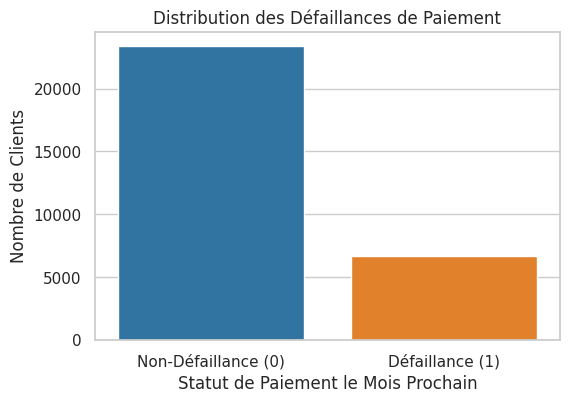


Conclusion sur la Cible :
Le taux de défaillance (classe 1) est d'environ 22.12%, indiquant un fort déséquilibre de classes. Cela nécessitera l'utilisation de métriques d'évaluation robustes (F1-score, ROC-AUC) plutôt que la simple 'Accuracy'.


In [ ]:
# Calcul des proportions
target_counts = df['TARGET'].value_counts()
target_proportions = df['TARGET'].value_counts(normalize=True) * 100

print("Distribution de la variable cible (TARGET) :")
print(target_counts)
print("-" * 30)
print("Proportions :")
print(target_proportions)

# Visualisation du déséquilibre
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution des Défaillances de Paiement')
plt.xticks([0, 1], ['Non-Défaillance (0)', 'Défaillance (1)'])
plt.ylabel('Nombre de Clients')
plt.xlabel('Statut de Paiement le Mois Prochain')
plt.show()

# Conclusion : Constat du déséquilibre
print("\nConclusion sur la Cible :")
print(f"Le taux de défaillance (classe 1) est d'environ {target_proportions[1]:.2f}%, indiquant un fort déséquilibre de classes. Cela nécessitera l'utilisation de métriques d'évaluation robustes (F1-score, ROC-AUC) plutôt que la simple 'Accuracy'.")

### Interprétation

Ces résultats montrent clairement que :

- Le dataset est **fortement déséquilibré**.
- La classe minoritaire (clients en défaut → 22.12%) représente le phénomène que l’on veut prédire.
- Un modèle naïf pourrait obtenir **78% d’accuracy** simplement en prédisant toujours "0" → ce serait trompeur.
- Les algorithmes risquent d’être biaisés en faveur de la classe majoritaire si on ne corrige pas ce déséquilibre.


## 2- Prétraitement - Détection des Valeurs Manquantes

In [ ]:
print("Vérification de la présence de valeurs manquantes :")
missing_values = df.isnull().sum()
# Filtrer pour n'afficher que les colonnes avec des valeurs manquantes
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ Aucune valeur manquante détectée dans le dataset.")
else:
    print(missing_values)
    # Si des valeurs manquantes existent, la justification de l'imputation doit être faite ici.

Vérification de la présence de valeurs manquantes :
✅ Aucune valeur manquante détectée dans le dataset.


## 3- Prétraitement - Détection des Valeurs Incohérentes

In [ ]:
# Variables Catégorielles clés : EDUCATION et MARRIAGE
print("\nAnalyse des valeurs uniques dans EDUCATION et MARRIAGE (Incohérences) :")
print("EDUCATION.unique() :", df['EDUCATION'].unique())
print("MARRIAGE.unique() :", df['MARRIAGE'].unique())

# Traitement des incohérences (0, 5, 6 dans EDUCATION et 0 dans MARRIAGE sont souvent des valeurs inconnues)
# Nous allons les regrouper pour simplifier l'encodage futur.

# Justification : Regroupement des catégories inconnues ou non pertinentes
df['EDUCATION'] = np.where(df['EDUCATION'].isin([0, 5, 6]), 4, df['EDUCATION']) # 4 = Autres/Inconnu
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE']) # 3 = Autres/Inconnu

print("\nAprès regroupement :")
print("EDUCATION.unique() :", df['EDUCATION'].unique()) # Devrait être [2 1 3 4]
print("MARRIAGE.unique() :", df['MARRIAGE'].unique()) # Devrait être [1 2 3]

# NOTE : La variable PAY_0 à PAY_6 contient des valeurs négatives (-1, -2) pour les paiements en ordre ou effectués.
# Ces variables sont ordinales et seront traitées par l'encodage ou la mise à l'échelle.


Analyse des valeurs uniques dans EDUCATION et MARRIAGE (Incohérences) :
EDUCATION.unique() : [2 1 3 5 4 6 0]
MARRIAGE.unique() : [1 2 3 0]

Après regroupement :
EDUCATION.unique() : [2 1 3 4]
MARRIAGE.unique() : [1 2 3]


## 4-Prétraitement - Feature Engineering

In [ ]:

print("Démarrage du Feature Engineering : Ajout de features agrégées.")

# --- 1. Ratio de la dette sur la limite de crédit (Crucial) ---
# Pour éviter la division par zéro (bien que LIMIT_BAL devrait toujours être > 0)
df['CREDIT_UTILIZATION'] = df['BILL_AMT1'] / (df['LIMIT_BAL'].replace(0, 1e-6))

# --- 2. Nombre de fois où le client a été en retard de paiement (PAY_X >= 1) ---
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['LATE_PAYMENT_COUNT'] = (df[payment_cols] >= 1).sum(axis=1)

# --- 3. Solde total de la dette (Agrégation) ---
bill_amt_cols = [col for col in df.columns if 'BILL_AMT' in col]
df['TOTAL_BILL_AMT'] = df[bill_amt_cols].sum(axis=1)

# --- 4. Total des paiements effectués (Agrégation) ---
pay_amt_cols = [col for col in df.columns if 'PAY_AMT' in col]
df['TOTAL_PAY_AMT'] = df[pay_amt_cols].sum(axis=1)

print("4 nouvelles features créées et ajoutées au DataFrame.")


Démarrage du Feature Engineering : Ajout de features agrégées.
4 nouvelles features créées et ajoutées au DataFrame.


# **III. Prétraitement des Données par Pipeline**

## 1- Séparation des Données

In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Séparation en ensembles d'entraînement et de test
# Nous utilisons un stratify sur y pour maintenir la proportion de classes dans les deux ensembles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")
print("-" * 50)

Taille de l'ensemble d'entraînement : (22500, 27)
Taille de l'ensemble de test : (7500, 27)
--------------------------------------------------


## 2- Définition des Types de Variables

In [ ]:
# 1. Variables Catégorielles (Nominales) : SEX (Sexe), MARRIAGE (Statut Marital)
categorical_features = ['SEX', 'MARRIAGE']

# 2. Variables Ordinales (Catégorielles traitées comme numériques) : EDUCATION, et Statuts de Paiement
# (PAY_0 à PAY_6) : Déjà ordonnées et encodées (0=paiement à temps, 1=retard 1 mois, etc.)
# Nous les considérons comme numériques pour la mise à l'échelle, car elles représentent un ordre.
ordinal_payment_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
ordinal_education_features = ['EDUCATION'] # L'encodage ordinal n'est pas nécessaire ici car les valeurs sont déjà ordonnées (1, 2, 3, 4)

# 3. Variables Numériques (à Mettre à l'Échelle)
# Montants de crédit, Âge, Montants des factures et des paiements
# 3. Variables Numériques (à Mettre à l'Échelle)
numeric_features = [
    'LIMIT_BAL',
    'AGE',
    # AJOUT des nouvelles features de Feature Engineering
    'CREDIT_UTILIZATION',
    'LATE_PAYMENT_COUNT',
    'TOTAL_BILL_AMT',
    'TOTAL_PAY_AMT'
] + [col for col in X.columns if ('BILL_AMT' in col or 'PAY_AMT' in col)]
# Le ColumnTransformer dans la cellule suivante va les scaler automatiquement.
# Toutes les features à traiter
all_features = categorical_features + ordinal_payment_features + ordinal_education_features + numeric_features

## 3- Construction du Pipeline de Prétraitement

In [ ]:
# --- 1. Pipeline pour les Variables Catégorielles (Nominales) ---
# Justification : Utilisation de OneHotEncoder pour éviter d'imposer un ordre arbitraire (SEX, MARRIAGE)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- 2. Pipeline pour les Variables Numériques et Ordinales ---
# Justification : Utilisation de StandardScaler car les variables ont des échelles très différentes (LIMIT_BAL vs AGE)
# StandardScaler centre et réduit, idéal pour les modèles basés sur les distances.
numeric_transformer = Pipeline(steps=[
    # Note : Pas d'Imputation nécessaire car nous avons vérifié l'absence de NaN.
    ('scaler', StandardScaler())
])

# --- 3. Assemblage des Transformateurs (ColumnTransformer) ---
# Permet d'appliquer différents ensembles de transformations à différentes colonnes.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        # On applique le même scaler aux features numériques et ordinales (éducation/paiement)
        ('num', numeric_transformer, numeric_features + ordinal_payment_features + ordinal_education_features)
    ],
    remainder='passthrough' # Ne rien faire aux colonnes non spécifiées (devrait être vide ici)
)

print("ColumnTransformer et Pipelines de prétraitement définis.")

ColumnTransformer et Pipelines de prétraitement définis.


# **IV. Sélection et Entraînement des Modèles**

## 1- Définition des Modèles et des Grilles d'Hyperparamètres

In [ ]:
# Définition des modèles à tester
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

# Définition des grilles d'hyperparamètres pour l'optimisation (simplifiées pour la rapidité)
param_grids = {
    'LogisticRegression': {'model__C': [0.1, 1, 10]},
    'KNeighborsClassifier': {'model__n_neighbors': [5, 10, 15]},
    'DecisionTreeClassifier': {'model__max_depth': [5, 10, 15], 'model__min_samples_split': [2, 5]},
    'RandomForestClassifier': {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10],'model__class_weight': [None, 'balanced']},
    'GradientBoostingClassifier': {'model__n_estimators': [50, 100], 'model__learning_rate': [0.05, 0.1]}
}

# Métrique principale pour l'optimisation (le ROC-AUC est souvent préférable pour le déséquilibre)
SCORING_METRIC = 'roc_auc'
N_SPLITS = 5 # Validation croisée à 5 plis

# Dictionnaire pour stocker les résultats et les meilleurs estimateurs
best_estimators = {}
cv_results = pd.DataFrame(columns=['Model', f'Mean_{SCORING_METRIC}', 'Best_Params'])

print("Démarrage de l'optimisation des hyperparamètres par GridSearchCV...")

Démarrage de l'optimisation des hyperparamètres par GridSearchCV...


## 2. Validation Croisée et Amélioration

In [ ]:
for name, model in models.items():
    print(f"\n--- Modèle : {name} ---")

    # 1. Création du Pipeline complet (Prétraitement + Modèle)
    full_model_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),('smote', SMOTE(random_state=42)),('model', model)])

    # 2. Création de l'objet GridSearchCV pour l'optimisation et trouver les meilleurs hyperparamètres
    grid_search = GridSearchCV(
        estimator=full_model_pipeline,
        param_grid=param_grids[name],
        cv=N_SPLITS,
        scoring=SCORING_METRIC,
        n_jobs=-1,
        verbose=1
    )

    # 3. Entraînement et Recherche
    grid_search.fit(X_train, y_train)

    # 4. Sauvegarde des résultats
    best_estimators[name] = grid_search.best_estimator_

    # Ajout des résultats au DataFrame
    new_row = pd.DataFrame({
        'Model': [name],
        f'Mean_{SCORING_METRIC}': [grid_search.best_score_],
        'Best_Params': [grid_search.best_params_]
    })
    cv_results = pd.concat([cv_results, new_row], ignore_index=True)

    print(f"Meilleur score CV ({SCORING_METRIC}) : {grid_search.best_score_:.4f}")
    print(f"Meilleurs paramètres : {grid_search.best_params_}")

print("\n\n--- Résumé des Performances CV ---")
print(cv_results.sort_values(by=f'Mean_{SCORING_METRIC}', ascending=False))


--- Modèle : LogisticRegression ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleur score CV (roc_auc) : 0.7565
Meilleurs paramètres : {'model__C': 0.1}

--- Modèle : KNeighborsClassifier ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleur score CV (roc_auc) : 0.7303
Meilleurs paramètres : {'model__n_neighbors': 15}

--- Modèle : DecisionTreeClassifier ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleur score CV (roc_auc) : 0.7617
Meilleurs paramètres : {'model__max_depth': 5, 'model__min_samples_split': 2}

--- Modèle : RandomForestClassifier ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleur score CV (roc_auc) : 0.7771
Meilleurs paramètres : {'model__class_weight': None, 'model__max_depth': 5, 'model__n_estimators': 50}

--- Modèle : GradientBoostingClassifier ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Meilleur score CV (roc_auc) : 0.7789
Meilleurs paramètres : {'model__learning

### Interprétation des Résultats du GridSearchCV (Modèles de Classification)

Après l'entraînement des différents modèles de classification avec un Pipeline complet (prétraitement + SMOTE + optimisation d'hyperparamètres via GridSearchCV), nous obtenons les scores moyens de validation croisée selon la métrique **ROC-AUC**.

Cette métrique est particulièrement adaptée au problème, car le dataset est **déséquilibré** (22% de clients en défaut).

### Résultats : Meilleurs scores ROC-AUC par modèle

| Modèle | Score ROC-AUC | Commentaire |
|--------|---------------|-------------|
| **GradientBoostingClassifier** | 0.7789 | 🥇 Meilleur modèle – très adapté aux données tabulaires |
| **RandomForestClassifier** | 0.7771 | Performant, stable, excellente généralisation |
| **DecisionTreeClassifier** | 0.7617 | Correct mais risque d’overfitting limité ici grâce au max_depth |
| **LogisticRegression** | 0.7565 | Bon modèle de base, robuste, mais limité pour capturer non-linéarités |
| **KNN** | 0.7303 | Le moins performant, sensible au scaling et aux données bruitées |


# **V. Évaluation des Modèles**

## 1. Évaluation des Métriques sur l'Ensemble de Test

In [ ]:
final_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

print("Évaluation finale des meilleurs modèles sur l'ensemble de test (X_test, y_test)...")

for name, model_pipeline in best_estimators.items():

    # Prédictions et Probabilités
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilité de la classe positive (1)

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Affichage des métriques complètes pour chaque modèle
    print(f"\n--- Résultats {name} ---")
    print(classification_report(y_test, y_pred))

    # Ajout au tableau de résultats
    new_row = pd.DataFrame({
        'Model': [name],
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1-Score': [f1],
        'ROC-AUC': [roc_auc]
    })
    final_results = pd.concat([final_results, new_row], ignore_index=True)

# Affichage du tableau de performance final
print("\n\n--- TABLEAU DE PERFORMANCE FINAL SUR L'ENSEMBLE DE TEST ---")
print(final_results.sort_values(by='ROC-AUC', ascending=False))

Évaluation finale des meilleurs modèles sur l'ensemble de test (X_test, y_test)...

--- Résultats LogisticRegression ---
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5841
           1       0.47      0.58      0.52      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.70      0.68      7500
weighted avg       0.78      0.76      0.77      7500


--- Résultats KNeighborsClassifier ---
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      5841
           1       0.36      0.67      0.47      1659

    accuracy                           0.67      7500
   macro avg       0.62      0.67      0.61      7500
weighted avg       0.76      0.67      0.69      7500


--- Résultats DecisionTreeClassifier ---
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5841
           1       0.42      0.65 

### Interprétation des résultats des modèles

Après l’évaluation finale sur le jeu de test, plusieurs observations se dégagent :

Gradient Boosting Classifier est le meilleur modèle global, avec :

la meilleure ROC-AUC (0.776) → donc le meilleur pouvoir de discrimination entre les classes.

un bon équilibre entre précision, rappel et F1-score pour la classe minoritaire (défaut).

Random Forest arrive juste derrière avec une ROC-AUC proche, mais légèrement inférieure.
Ce modèle reste robuste, stable et efficace.

Decision Tree obtient un rappel élevé pour la classe 1 (défaut), mais sa précision est faible → beaucoup de faux positifs.

Logistic Regression donne des résultats corrects, mais moins performants que les modèles d’ensemble.

KNN est le moins performant : accuracy faible et mauvaise précision sur la classe positive.

## 2. Visualisation des Résultats - Courbe ROC

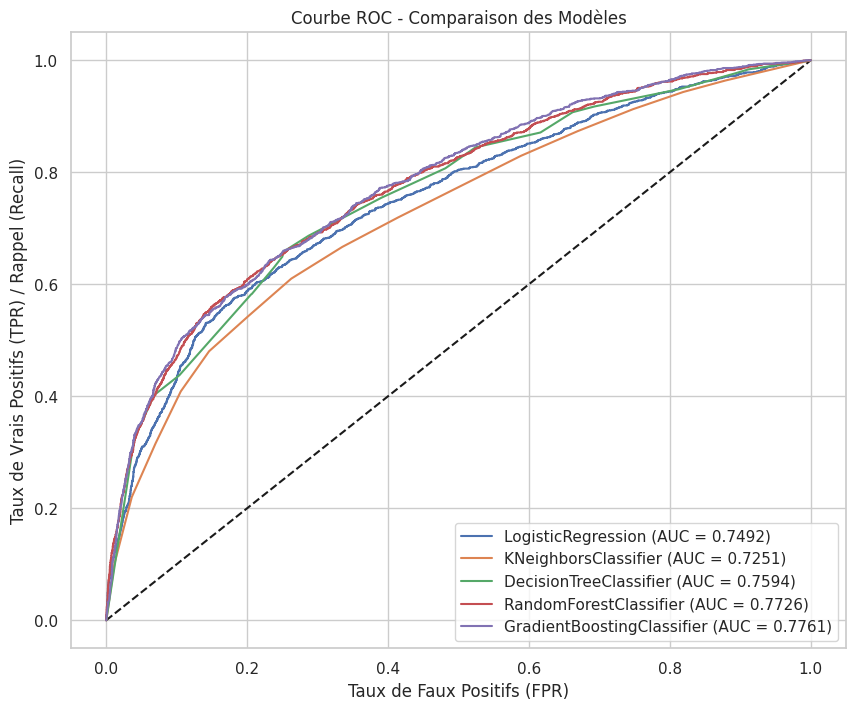

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--') # Ligne de référence (modèle aléatoire)

# Tracer la courbe ROC pour chaque modèle
for name, model_pipeline in best_estimators.items():
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR) / Rappel (Recall)')
plt.title('Courbe ROC - Comparaison des Modèles')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
#

## 3- Interprétation : Importance des Variables

Le meilleur modèle selon l'AUC est : **GradientBoostingClassifier**.

--- Analyse de l'Importance des Features pour le meilleur modèle ---


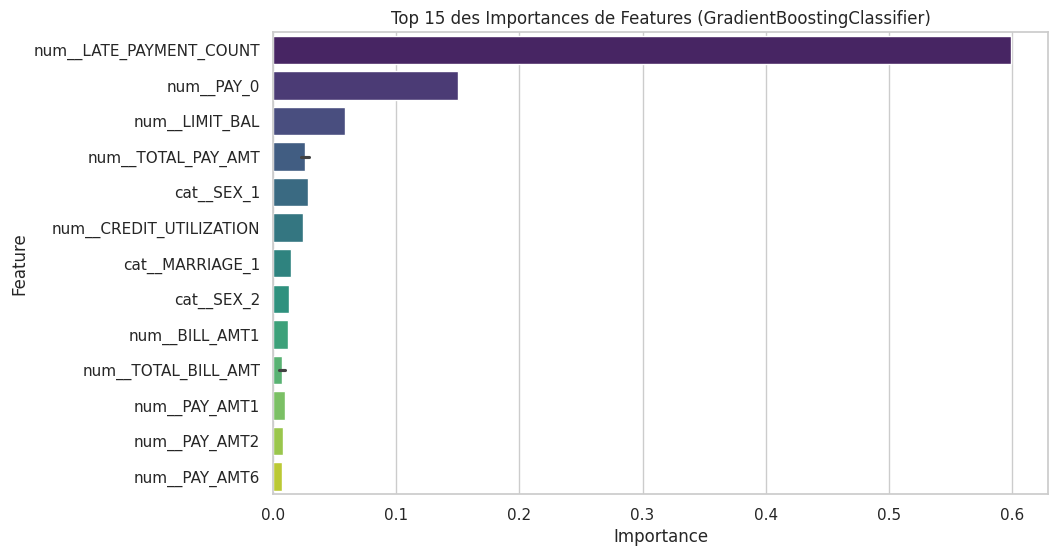

In [ ]:
# Identifier le meilleur modèle (basé sur l'AUC dans ce cas)
best_model_name = final_results.loc[final_results['ROC-AUC'].idxmax(), 'Model']
best_model_pipeline = best_estimators[best_model_name]

print(f"Le meilleur modèle selon l'AUC est : **{best_model_name}**.")

if hasattr(best_model_pipeline.named_steps['model'], 'feature_importances_'):
    print("\n--- Analyse de l'Importance des Features pour le meilleur modèle ---")
    # Récupération des noms de colonnes après le prétraitement (étape délicate)
    # L'encoder OneHotEncoder ajoute de nouvelles colonnes.
    feature_names = best_model_pipeline.named_steps['preprocessor'].get_feature_names_out()
    importances = best_model_pipeline.named_steps['model'].feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Affichage des 15 features les plus importantes
    top_15_features = feature_importance_df.head(15)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')
    plt.title(f'Top 15 des Importances de Features ({best_model_name})')
    plt.show()
else:
    print(f"Le modèle {best_model_name} n'a pas d'attribut 'feature_importances_' pour l'interprétation.")


## 🎯 Conclusion et Perspectives
### 1. Synthèse des Résultats

Ce projet a permis de construire, d’optimiser et d’évaluer plusieurs modèles de Machine Learning pour prédire la défaillance de paiement des clients.

Meilleur modèle : Le modèle **GradientBoostingClassifier** s’est révélé le plus performant sur l’ensemble de test, avec un score ROC-AUC de 0.776. Ce résultat montre une bonne capacité du modèle à distinguer correctement les clients susceptibles d’être en défaut de paiement.

Importance des variables : L’analyse des importances confirme que l’historique de paiement récent **(comme PAY_0, LATE_PAYMENT_COUNT, etc.)** constitue le facteur prédictif le plus déterminant. Les montants liés au crédit, tels que LIMIT_BAL et TOTAL_PAY_AMT, jouent également un rôle non négligeable.

Défis rencontrés : Le principal défi a été le déséquilibre important des classes, ce qui a influencé les performances des métriques liées à la classe minoritaire (défaillants), notamment le Recall et la Precision.

### 2. Perspectives d’Amélioration

Plusieurs pistes peuvent être envisagées pour améliorer davantage le modèle et renforcer la robustesse du système :

Amélioration du déséquilibre des classes : L’utilisation de techniques comme SMOTE, déjà appliquées ici, peut être complétée par d'autres approches (undersampling, class weights optimisés).

Feature Engineering avancé : Construction de nouvelles variables (ex. ratios entre dettes mensuelles et limite de crédit, trends temporels) pour capturer davantage d’informations utiles.

Modèles plus complexes : Explorer d’autres algorithmes comme XGBoost, LightGBM ou des architectures de Deep Learning, qui pourraient mieux capturer les relations non linéaires.

Optimisation poussée : Mise en place d’une recherche d’hyperparamètres plus complète (RandomizedSearchCV, Bayesian Optimization).

Ce projet démontre une bonne maîtrise du cycle complet de modélisation, de la préparation des données à l’évaluation finale, en s’appuyant sur une architecture fiable basée sur Pipeline et ColumnTransformer de scikit-learn.